<a href="https://colab.research.google.com/github/DilaAyuP/Analisis-Sentimen-Ulasan-Aplikasi-Pocket-ITERA-Menggunakan-Algoritma-Naive-bayes/blob/main/TUBES_Pembelajaran_Mesin_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALISIS SENTIMEN ULASAN APLIKASI POCKET ITERA TERBARU DI GOOGLE PLAYSTORE MENGGUNAKAN ALGORITMA NAIVE BAYES

# Load Dataset

[teks link](https:// [teks link](https:// [teks link](https://)))Pada tahap ini, dilakukan load dataset atau mengupload dataset. Dataset dapat disimpan di Google Drive dan mengaksesnya langsung melalu Google Colab

In [ ]:
#load package drive
from google.colab import drive
import pandas as pd
import numpy as np

In [ ]:
#memberikan akses kepada google colab
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#buat variabel jalur/path file dataset
path = '/content/drive/My Drive/smt6/PM/datasetPM.csv'

In [ ]:
#menampilkan data dari dataset yang telah ada
my_df = pd.read_csv(path)
print(my_df)

                           username  score                           at  \
0                 AHMAD DAFFA MAKKI      1     Thursday, April 04, 2024   
1                    Samuel Roniasi      4              7 Februari 2024   
2                          Rokuzawa      2              4 Desember 2023   
3             Hanggar Jati Priangga      1              23 Oktober 2023   
4                      Yudi Sukamto      5               9 Januari 2024   
5                        Arif Wahid      5              23 Oktober 2023   
6              marsilea quadrifolia      3              1 Februari 2024   
7                      Hafiz Mafazi      5             27 Februari 2024   
8                      David Chiang      5              7 Februari 2024   
9               Sayyid Hidayatullah      5              23 Oktober 2023   
10                    namaku siapa?      5              27 Oktober 2023   
11                   Sintong Sinaga      5  Tuesday, September 05, 2023   
12                      I

In [ ]:
# lakukan filter kolom lagi karena kita hanya membutuhkan kolom score dan content
my_df = my_df[['score', 'content']]

In [ ]:
my_df.head() #menampilkan 5 kolom teratas dari kolom score dan content

,score,content
0,1,"saya tidak scan absen, jika di scan menggunaka..."
1,4,Tolong dibikin fitur scan qr dari galeri supay...
2,2,Tolong dibuatnya bisa scan barcode dri foto do...
3,1,Fitur sangat minim dibandingkan pocket yang sa...
4,5,Cepat tambah fitur seperti pocket lama min


# Pelabelan

Untuk pelabelan, disini menggunakan percabangan if elif. Jika score < 3 maka akan mengembalikan nilai negatif, jika score == 3 maka akan mengembalikan nilai netral, dan jika score > 3 maka akan mengembalikan nilai positif

In [ ]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 4:
    return 'Positif'
  elif score == 5:
    return 'Positif'
my_df['label'] = my_df['score'].apply(pelabelan)

In [ ]:
#save hasil pelabelan menjadi file csv
my_df.to_csv("datasetPM_new.csv", index = False)

# Data Cleaning

Pembersihan data ini dilakukan untuk untuk memastikan kualitas dan keakuratan data yang digunakan dalam analisis. Data yang kotor dan tidak konsisten dapat menghasilkan hasil analisis yang tidak akurat dan menyesatkan. Proses data cleaning dilakukan untuk mengatasi missing values dalam dataset yang ada.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('/content/datasetPM_new.csv')
my_df.head(30)

,score,content,label
0,1,"saya tidak scan absen, jika di scan menggunaka...",Negatif
1,4,Tolong dibikin fitur scan qr dari galeri supay...,Positif
2,2,Tolong dibuatnya bisa scan barcode dri foto do...,Negatif
3,1,Fitur sangat minim dibandingkan pocket yang sa...,Negatif
4,5,Cepat tambah fitur seperti pocket lama min,Positif
5,5,Aplikasi nya sangad mantab,Positif
6,3,Gk bisa sign in pdhl email nya dh bener sm pw ...,NaN
7,5,mantap,Positif
8,5,Bagus,Positif
9,5,First min dapet apa,Positif


In [ ]:
#menampilkan informasi detail tentang dataframe seperti jumlah baris data, nama kolom, jumlah data dan tipe datanya
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   score    25 non-null     int64 
 1   content  25 non-null     object
 2   label    22 non-null     object
dtypes: int64(1), object(2)
memory usage: 728.0+ bytes


In [ ]:
#menampilkan baris yang memiliki nilai null (NaN) pada setiap kolom
#menggunakan fitur isna() yang telah disediakan oleh library pandas
my_df.isna()

,score,content,label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,True
7,False,False,False
8,False,False,False
9,False,False,False


In [ ]:
#menghitung jumlah baris data yang bersifat null
my_df.isnull().sum()

score      0
content    0
label      3
dtype: int64

# Data Cleaning - 1. Handling Missing Value

In [ ]:
my_df.dropna(subset=['label'], inplace = True)

In [ ]:
my_df.isnull().sum()

score      0
content    0
label      0
dtype: int64

In [ ]:
my_df.head(30)

,score,content,label
0,1,"saya tidak scan absen, jika di scan menggunaka...",Negatif
1,4,Tolong dibikin fitur scan qr dari galeri supay...,Positif
2,2,Tolong dibuatnya bisa scan barcode dri foto do...,Negatif
3,1,Fitur sangat minim dibandingkan pocket yang sa...,Negatif
4,5,Cepat tambah fitur seperti pocket lama min,Positif
5,5,Aplikasi nya sangad mantab,Positif
7,5,mantap,Positif
8,5,Bagus,Positif
9,5,First min dapet apa,Positif
10,5,Bagus,Positif


In [ ]:
my_df.to_csv("datasetPM_preprocessing.csv", index = False) #simpan hasil ke dalam file csv

# Text PreProcessing

In [ ]:
import pandas as pd
df = pd.read_csv('/content/datasetPM_preprocessing.csv')
df.head(30)

,score,content,label
0,1,"saya tidak scan absen, jika di scan menggunaka...",Negatif
1,4,Tolong dibikin fitur scan qr dari galeri supay...,Positif
2,2,Tolong dibuatnya bisa scan barcode dri foto do...,Negatif
3,1,Fitur sangat minim dibandingkan pocket yang sa...,Negatif
4,5,Cepat tambah fitur seperti pocket lama min,Positif
5,5,Aplikasi nya sangad mantab,Positif
6,5,mantap,Positif
7,5,Bagus,Positif
8,5,First min dapet apa,Positif
9,5,Bagus,Positif


# Text PreProcessing - 1. Case Folding

Proses Case Folding adalah proses mengubah seluruh hurup menjadi huruf kecil. Pada proses ini, semua karakter 'A'-'Z' yang terdapat dalam data akan diubah menjadi karakter 'a'-'z'

In [ ]:
import re
def clean_text(df, text_field, new_text_field_name):
  my_df[new_text_field_name] = my_df[text_field].str.lower()
  my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
  #remove number
  my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
  return my_df

In [ ]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(30)

,score,content,label,text_clean
0,1,"saya tidak scan absen, jika di scan menggunaka...",Negatif,saya tidak scan absen jika di scan menggunakan...
1,4,Tolong dibikin fitur scan qr dari galeri supay...,Positif,tolong dibikin fitur scan qr dari galeri supay...
2,2,Tolong dibuatnya bisa scan barcode dri foto do...,Negatif,tolong dibuatnya bisa scan barcode dri foto do...
3,1,Fitur sangat minim dibandingkan pocket yang sa...,Negatif,fitur sangat minim dibandingkan pocket yang sa...
4,5,Cepat tambah fitur seperti pocket lama min,Positif,cepat tambah fitur seperti pocket lama min
5,5,Aplikasi nya sangad mantab,Positif,aplikasi nya sangad mantab
7,5,mantap,Positif,mantap
8,5,Bagus,Positif,bagus
9,5,First min dapet apa,Positif,first min dapet apa
10,5,Bagus,Positif,bagus


# Text PreProcessing - 2. Normalisasi

Normalisasi digunakan untuk mengubah kata yang tidak terdeteksi pada KBBI menjadi kata yang dapat dideteksi dengan tujuan untuk meningkatkan performa model yang akan digunakan.

In [ ]:
#normalisasi
norm = {"apk" : "aplikasi", "menyulitkn" : "menyulitkan", "dri" : "dari", "make" : "pakai", "gaperlu" : "tidak perlu", "kalo" : "kalau", "poket" : "pocket", "flexibel" : "fleksibel", "sangad" : "sangat", "mantab" : "mantap", "dh" : "sudah", "sm" : "sama", "pw" : "kata sandi", "gud" : "bagus", "bolela" : "boleh lah", "yg" : "yang", "library" : "perpustakaan", "sofar" : "sejauh ini", "cuma" : "hanya", "klo" : "kalau", "pake" : "pakai", "nice" : "bagus", "minim" : "sedikit"}

def normalisasi(str_text):
  for i in norm:
      str_text = str_text.replace(i, norm[i])
  return str_text

data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: normalisasi(x))
data_clean.head(30)

,score,content,label,text_clean
0,1,"saya tidak scan absen, jika di scan menggunaka...",Negatif,saya tidak scan absen jika di scan menggunakan...
1,4,Tolong dibikin fitur scan qr dari galeri supay...,Positif,tolong dibikin fitur scan qr dari galeri supay...
2,2,Tolong dibuatnya bisa scan barcode dri foto do...,Negatif,tolong dibuatnya bisa scan barcode dari foto d...
3,1,Fitur sangat minim dibandingkan pocket yang sa...,Negatif,fitur sangat sedikit dibandingkan pocket yang ...
4,5,Cepat tambah fitur seperti pocket lama min,Positif,cepat tambah fitur seperti pocket lama min
5,5,Aplikasi nya sangad mantab,Positif,aplikasi nya sangat mantap
7,5,mantap,Positif,mantap
8,5,Bagus,Positif,bagus
9,5,First min dapet apa,Positif,first min dapet apa
10,5,Bagus,Positif,bagus


# Text PreProcessing - 2. Stopword Removal

Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Jadi, stopword removal adalah proses menghilangkan kata-kata yang dianggap tidak penting dan memiliki makna minim dalam sebuah teks. Contoh stopword dalam bahasa Indonesia adalah "yang", "di", "dan", dll. Makna dibalik penggunaaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, sehingga hanya berfokus pada kata-kata penting sebagai gantinya.

In [ ]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_stopword'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(30)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,score,content,label,text_clean,text_stopword
0,1,"saya tidak scan absen, jika di scan menggunaka...",Negatif,saya tidak scan absen jika di scan menggunakan...,scan absen scan aplikasi pemindai terdeteksi p...
1,4,Tolong dibikin fitur scan qr dari galeri supay...,Positif,tolong dibikin fitur scan qr dari galeri supay...,tolong dibikin fitur scan qr galeri menyulitka...
2,2,Tolong dibuatnya bisa scan barcode dri foto do...,Negatif,tolong dibuatnya bisa scan barcode dari foto d...,tolong scan barcode foto biar pakai device absen
3,1,Fitur sangat minim dibandingkan pocket yang sa...,Negatif,fitur sangat sedikit dibandingkan pocket yang ...,fitur dibandingkan pocket satunya flexible
4,5,Cepat tambah fitur seperti pocket lama min,Positif,cepat tambah fitur seperti pocket lama min,cepat fitur pocket min
5,5,Aplikasi nya sangad mantab,Positif,aplikasi nya sangat mantap,aplikasi nya mantap
7,5,mantap,Positif,mantap,mantap
8,5,Bagus,Positif,bagus,bagus
9,5,First min dapet apa,Positif,first min dapet apa,first min dapet
10,5,Bagus,Positif,bagus,bagus


# Text PreProcessing - 3. Tokenizing

Tokenizing adalah proses pemisahan tejs menjadi potongan-potongan yang disebut sebagai token untuk kemudian dianalisa. Kata, angka, simbol, tanda baca, dan entitas penting lainnya dapat dianggap sebagai token. Di dalam NLP, token sebagai "kata" meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat. Manfaat tokenizing dalam preprocessing adalah :
1. Mempermudah analisis teks: Tokenizing memungkinkan komputer untuk menganalisis teks dengan lebih detail, seperti menghitung frekuensi kata, mengidentifikasi kata kunci, dan membangun struktur kalimat.

2. Meningkatkan akurasi model bahasa: Tokenizing dapat membantu meningkatkan akurasi model bahasa, seperti model machine translation dan sentiment analysis, dengan menyediakan representasi teks yang lebih baik.

3. Mempermudah pemrosesan teks: Tokenizing dapat menyederhanakan proses pemrosesan teks, seperti pembersihan teks, normalisasi teks, dan stemming.

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_stopword'].apply(lambda x: word_tokenize(x))
data_clean.head(30)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,score,content,label,text_clean,text_stopword,text_tokens
0,1,"saya tidak scan absen, jika di scan menggunaka...",Negatif,saya tidak scan absen jika di scan menggunakan...,scan absen scan aplikasi pemindai terdeteksi p...,"[scan, absen, scan, aplikasi, pemindai, terdet..."
1,4,Tolong dibikin fitur scan qr dari galeri supay...,Positif,tolong dibikin fitur scan qr dari galeri supay...,tolong dibikin fitur scan qr galeri menyulitka...,"[tolong, dibikin, fitur, scan, qr, galeri, men..."
2,2,Tolong dibuatnya bisa scan barcode dri foto do...,Negatif,tolong dibuatnya bisa scan barcode dari foto d...,tolong scan barcode foto biar pakai device absen,"[tolong, scan, barcode, foto, biar, pakai, dev..."
3,1,Fitur sangat minim dibandingkan pocket yang sa...,Negatif,fitur sangat sedikit dibandingkan pocket yang ...,fitur dibandingkan pocket satunya flexible,"[fitur, dibandingkan, pocket, satunya, flexible]"
4,5,Cepat tambah fitur seperti pocket lama min,Positif,cepat tambah fitur seperti pocket lama min,cepat fitur pocket min,"[cepat, fitur, pocket, min]"
5,5,Aplikasi nya sangad mantab,Positif,aplikasi nya sangat mantap,aplikasi nya mantap,"[aplikasi, nya, mantap]"
7,5,mantap,Positif,mantap,mantap,[mantap]
8,5,Bagus,Positif,bagus,bagus,[bagus]
9,5,First min dapet apa,Positif,first min dapet apa,first min dapet,"[first, min, dapet]"
10,5,Bagus,Positif,bagus,bagus,[bagus]


# Text PreProcessing - 4. Stemming

Stemming adalah proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Untuk melakukan stemminng bahasa Indonesia, dapat menggunakan library Python Sastrawi. Library Sastrawi menerapkan Algoritma Nazief dan Adriani dalam melakukan stemming bahasa Indonesia

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.3 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# STEMMING
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter

#create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#stemmed
def stemmed_wrapper(term):
  return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
  for term in document:
    if term not in term_dict:
      term_dict[term] = ' '

print(len(term_dict))
print("----------------------------------------")
for term in term_dict:
  term_dict[term] = stemmed_wrapper(term)
  hitung+=1
  print(hitung, ":", term, ":", term_dict[term])

print(term_dict)
print("----------------------------------------")

#apply stemmed term to dataframe
def get_stemmed_term(document):
  return [term_dict[term] for term in document]

#script ini bisa dipisah dari eksekusinya setelah pembacaan term selesai
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(30)

63
----------------------------------------
1 : scan : scan
2 : absen : absen
3 : aplikasi : aplikasi
4 : pemindai : pindai
5 : terdeteksi : deteksi
6 : pocket : pocket
7 : tolong : tolong
8 : dibikin : bikin
9 : fitur : fitur
10 : qr : qr
11 : galeri : galeri
12 : menyulitkan : sulit
13 : device : device
14 : terimakasi : terimakasi
15 : barcode : barcode
16 : foto : foto
17 : biar : biar
18 : pakai : pakai
19 : dibandingkan : banding
20 : satunya : satu
21 : flexible : flexible
22 : cepat : cepat
23 : min : min
24 : nya : nya
25 : mantap : mantap
26 : bagus : bagus
27 : first : first
28 : dapet : dapet
29 : terkadang : terkadang
30 : sulit : sulit
31 : presensi : presensi
32 : menarik : tarik
33 : ditingkatkan : tingkat
34 : membaik : baik
35 : akses : akses
36 : penyimpanan : simpan
37 : penggunaan : guna
38 : ringan : ringan
39 : sistem : sistem
40 : absensi : absensi
41 : fotogambar : fotogambar
42 : saran : saran
43 : akademik : akademik
44 : memuat : muat
45 : nilai : nilai
46 :

,score,content,label,text_clean,text_stopword,text_tokens,text_steamindo
0,1,"saya tidak scan absen, jika di scan menggunaka...",Negatif,saya tidak scan absen jika di scan menggunakan...,scan absen scan aplikasi pemindai terdeteksi p...,"[scan, absen, scan, aplikasi, pemindai, terdet...",scan absen scan aplikasi pindai deteksi pocket...
1,4,Tolong dibikin fitur scan qr dari galeri supay...,Positif,tolong dibikin fitur scan qr dari galeri supay...,tolong dibikin fitur scan qr galeri menyulitka...,"[tolong, dibikin, fitur, scan, qr, galeri, men...",tolong bikin fitur scan qr galeri sulit absen ...
2,2,Tolong dibuatnya bisa scan barcode dri foto do...,Negatif,tolong dibuatnya bisa scan barcode dari foto d...,tolong scan barcode foto biar pakai device absen,"[tolong, scan, barcode, foto, biar, pakai, dev...",tolong scan barcode foto biar pakai device absen
3,1,Fitur sangat minim dibandingkan pocket yang sa...,Negatif,fitur sangat sedikit dibandingkan pocket yang ...,fitur dibandingkan pocket satunya flexible,"[fitur, dibandingkan, pocket, satunya, flexible]",fitur banding pocket satu flexible
4,5,Cepat tambah fitur seperti pocket lama min,Positif,cepat tambah fitur seperti pocket lama min,cepat fitur pocket min,"[cepat, fitur, pocket, min]",cepat fitur pocket min
5,5,Aplikasi nya sangad mantab,Positif,aplikasi nya sangat mantap,aplikasi nya mantap,"[aplikasi, nya, mantap]",aplikasi nya mantap
7,5,mantap,Positif,mantap,mantap,[mantap],mantap
8,5,Bagus,Positif,bagus,bagus,[bagus],bagus
9,5,First min dapet apa,Positif,first min dapet apa,first min dapet,"[first, min, dapet]",first min dapet
10,5,Bagus,Positif,bagus,bagus,[bagus],bagus


In [ ]:
data_clean.to_csv('hasil_TextPreProcessing_Pocket.csv', index = False) #simpan hasil text preprocessing

# Text Visualization

In [ ]:
data_clean.head(30)

,score,content,label,text_clean,text_stopword,text_tokens,text_steamindo
0,1,"saya tidak scan absen, jika di scan menggunaka...",Negatif,saya tidak scan absen jika di scan menggunakan...,scan absen scan aplikasi pemindai terdeteksi p...,"[scan, absen, scan, aplikasi, pemindai, terdet...",scan absen scan aplikasi pindai deteksi pocket...
1,4,Tolong dibikin fitur scan qr dari galeri supay...,Positif,tolong dibikin fitur scan qr dari galeri supay...,tolong dibikin fitur scan qr galeri menyulitka...,"[tolong, dibikin, fitur, scan, qr, galeri, men...",tolong bikin fitur scan qr galeri sulit absen ...
2,2,Tolong dibuatnya bisa scan barcode dri foto do...,Negatif,tolong dibuatnya bisa scan barcode dari foto d...,tolong scan barcode foto biar pakai device absen,"[tolong, scan, barcode, foto, biar, pakai, dev...",tolong scan barcode foto biar pakai device absen
3,1,Fitur sangat minim dibandingkan pocket yang sa...,Negatif,fitur sangat sedikit dibandingkan pocket yang ...,fitur dibandingkan pocket satunya flexible,"[fitur, dibandingkan, pocket, satunya, flexible]",fitur banding pocket satu flexible
4,5,Cepat tambah fitur seperti pocket lama min,Positif,cepat tambah fitur seperti pocket lama min,cepat fitur pocket min,"[cepat, fitur, pocket, min]",cepat fitur pocket min
5,5,Aplikasi nya sangad mantab,Positif,aplikasi nya sangat mantap,aplikasi nya mantap,"[aplikasi, nya, mantap]",aplikasi nya mantap
7,5,mantap,Positif,mantap,mantap,[mantap],mantap
8,5,Bagus,Positif,bagus,bagus,[bagus],bagus
9,5,First min dapet apa,Positif,first min dapet apa,first min dapet,"[first, min, dapet]",first min dapet
10,5,Bagus,Positif,bagus,bagus,[bagus],bagus


In [ ]:
# karena akan menggunakan algoritma naive bayes, maka perlu mengubah nilai positif=1 dan negatif=0
data_clean = data_clean.replace({'Positif':1, 'Negatif':0})
data_clean.head(30)

,score,content,label,text_clean,text_stopword,text_tokens,text_steamindo
0,1,"saya tidak scan absen, jika di scan menggunaka...",0,saya tidak scan absen jika di scan menggunakan...,scan absen scan aplikasi pemindai terdeteksi p...,"[scan, absen, scan, aplikasi, pemindai, terdet...",scan absen scan aplikasi pindai deteksi pocket...
1,4,Tolong dibikin fitur scan qr dari galeri supay...,1,tolong dibikin fitur scan qr dari galeri supay...,tolong dibikin fitur scan qr galeri menyulitka...,"[tolong, dibikin, fitur, scan, qr, galeri, men...",tolong bikin fitur scan qr galeri sulit absen ...
2,2,Tolong dibuatnya bisa scan barcode dri foto do...,0,tolong dibuatnya bisa scan barcode dari foto d...,tolong scan barcode foto biar pakai device absen,"[tolong, scan, barcode, foto, biar, pakai, dev...",tolong scan barcode foto biar pakai device absen
3,1,Fitur sangat minim dibandingkan pocket yang sa...,0,fitur sangat sedikit dibandingkan pocket yang ...,fitur dibandingkan pocket satunya flexible,"[fitur, dibandingkan, pocket, satunya, flexible]",fitur banding pocket satu flexible
4,5,Cepat tambah fitur seperti pocket lama min,1,cepat tambah fitur seperti pocket lama min,cepat fitur pocket min,"[cepat, fitur, pocket, min]",cepat fitur pocket min
5,5,Aplikasi nya sangad mantab,1,aplikasi nya sangat mantap,aplikasi nya mantap,"[aplikasi, nya, mantap]",aplikasi nya mantap
7,5,mantap,1,mantap,mantap,[mantap],mantap
8,5,Bagus,1,bagus,bagus,[bagus],bagus
9,5,First min dapet apa,1,first min dapet apa,first min dapet,"[first, min, dapet]",first min dapet
10,5,Bagus,1,bagus,bagus,[bagus],bagus


In [ ]:
data_negatif = data_clean[data_clean['label'] == 0]
data_positif = data_clean[data_clean['label'] == 1]

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


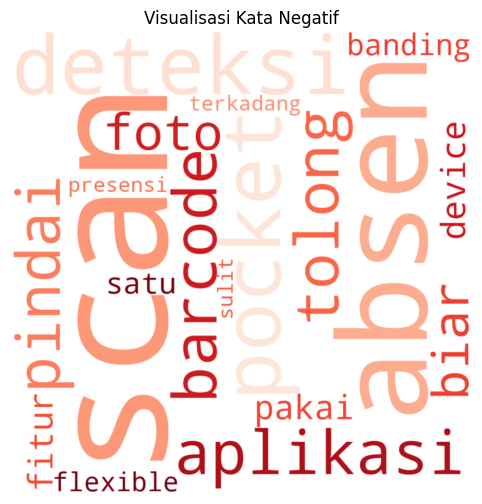

In [ ]:
#visualisasi kata negatif
all_text_s0 = ' '.join(word for word in data_negatif["text_steamindo"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

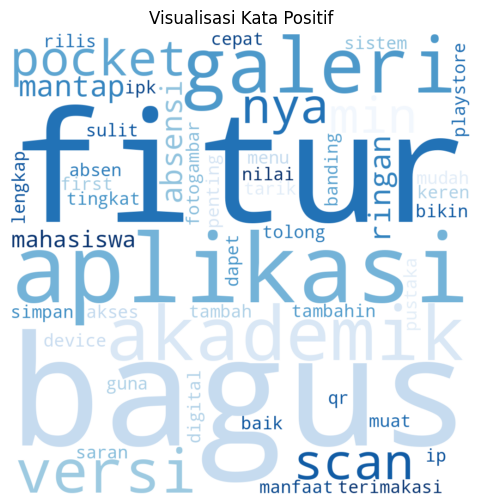

In [ ]:
#visualisasi kata positif
all_text_s0 = ' '.join(word for word in data_positif["text_steamindo"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
data_clean['label'].value_counts()

label
1    18
0     4
Name: count, dtype: int64

In [ ]:
import seaborn as sns

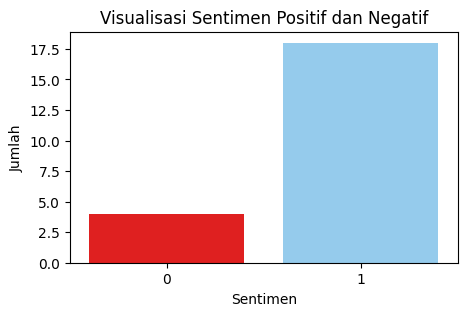

In [ ]:
#visualisasi sentimen positif dan negatif
plt.figure(figsize=(5, 3))
sns.countplot(x="label", hue="label", data=data_clean, palette=["red", "lightskyblue"], legend=False)
plt.title('Visualisasi Sentimen Positif dan Negatif')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

# Pembobotan TF-IDF

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Pembobotan TF-IDF = 1. Splitting Data

In [ ]:
#memisahkan data menjadi data latih dan data uji
x = data_clean['text_clean']
y = data_clean['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42) #data testing sebesar 15%, data latih sebesar 85%

# Pembobotan TF-IDF = 2. Pembobotan

In [ ]:
#menggunakan CountVectorizer untuk mengubah semua teks sebelumnya menjadi nilai angka atau numerik
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

#Algoritma Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train_vec, y_train)

MultinomialNB()

In [ ]:
y_prediksi = naive_bayes.predict(x_test_vec)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#evaluasi model
accuracy = accuracy_score(y_test, y_prediksi)
classification_rep = classification_report(y_test, y_prediksi, target_names=['negatif', 'positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klarifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.5

Laporan Klarifikasi :
               precision    recall  f1-score   support

     negatif       0.50      0.50      0.50         2
     positif       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



# Testing

In [ ]:
new_text = input("\nMasukkan teks baru :")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
  sentiment_label = "Positif"
elif predicted_sentimen[0] == 0:
  sentiment_label = "Negatif"

print("Hasil Analisis Sentimen untuk Teks Baru :", sentiment_label)


Masukkan teks baru :aplikasinya keren
Hasil Analisis Sentimen untuk Teks Baru : Positif
